### Esegui una ricerca su un tema di tuo interesse
- Trova un Dataframe pubblico sul tema selezionato (Kaggle)
- Carica i dati in Colab
- Pulisci e descrivi i dati
- Calcola un minimo di 10 statistiche interessanti
- Crea dei grafici a sostegno della tua tesi
- Crea un report di massimo una pagina per spiegare lavoro

Bonus points:
- Integra con dei dati di altre fonti!


# **Inizio Lavori**

Import e pulizia del df contenente dati relativi al mondo del cinema con lettura di righe e colonne

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/usnmweb/python-AMA/main/csv/filmtv_movies.csv'
df = pd.read_csv(url)
df.columns
print(len(df.index), len(df.columns))
df = df.dropna()
print(len(df.index), len(df.columns))

41399 19
17422 19


# 1) Top 5

Questo codice crea un DataFrame contenente le prime 5 righe del DataFrame originale ordinate per 'avg_vote'. Poi seleziona colonne specifiche "voto, titolo, anno e genere" e stampa le informazioni corrispondenti. Successivamente, crea un grafico a barre per visualizzare gli anni e i voti medi della top 5 film.

la top 5 con il voto medio piu alto sono:                                   title  year        genre
22573              Rembrandt's J'accuse  2008  Documentary
16445  The Godfather Trilogy: 1901-1980  1992        Drama
5169                   Sunset Boulevard  1950        Drama
2562                Ladri di biciclette  1948        Drama
4678                       Modern Times  1936       Comedy


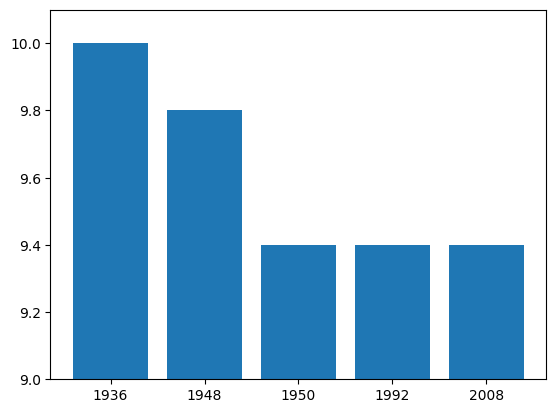

In [2]:
top_five = df.sort_values(by='avg_vote', ascending=False).head(5)
list_of_columns = ["title" ,"year", "genre"]
print("la top 5 con il voto medio piu alto sono:",top_five[list_of_columns])

import matplotlib.pyplot as plt
import numpy as np

short_df = top_five.dropna(subset=['avg_vote'])

x = short_df["year"]
y = short_df["avg_vote"]

x_sorted = sorted(x)

x_ticks = np.arange(len(x_sorted))

plt.bar(x_ticks, y)

plt.ylim(9, 10.1)

plt.xticks(x_ticks, x_sorted)

plt.show()

# 2) Attore che ha fatto più film.

Questo codice filtra il DataFrame per escludere le righe in cui la colonna 'actors' contiene la stringa 'Attori non professionisti'. Quindi abbiamo calcolato il numero di film per ciascun attore nel DataFrame filtrato, identificato l'attore con il numero massimo di film e stampa un messaggio che indica quale attore ha recitato nel maggior numero di film e quanti sono.
Da df il primo posto viene conteso da 4 attori

In [3]:
df_filtered = df[df['actors'] != 'Attori non professionisti']

actor_counts = df_filtered['actors'].value_counts()

most_films_actor = actor_counts.idxmax()
number_of_films = actor_counts.loc[most_films_actor]

print(f"{most_films_actor} appeared in {number_of_films} films.")

Musidora, Edouard Mathé, Marcel Lévesque, Fernand Herrmann appeared in 10 films.


# 3) Regista con più film

Questo codice calcola il numero di film diretti da ciascun regista, identifica i primi 10 registi con il maggior numero di film e crea un grafico a barre per visualizzare i risultati.








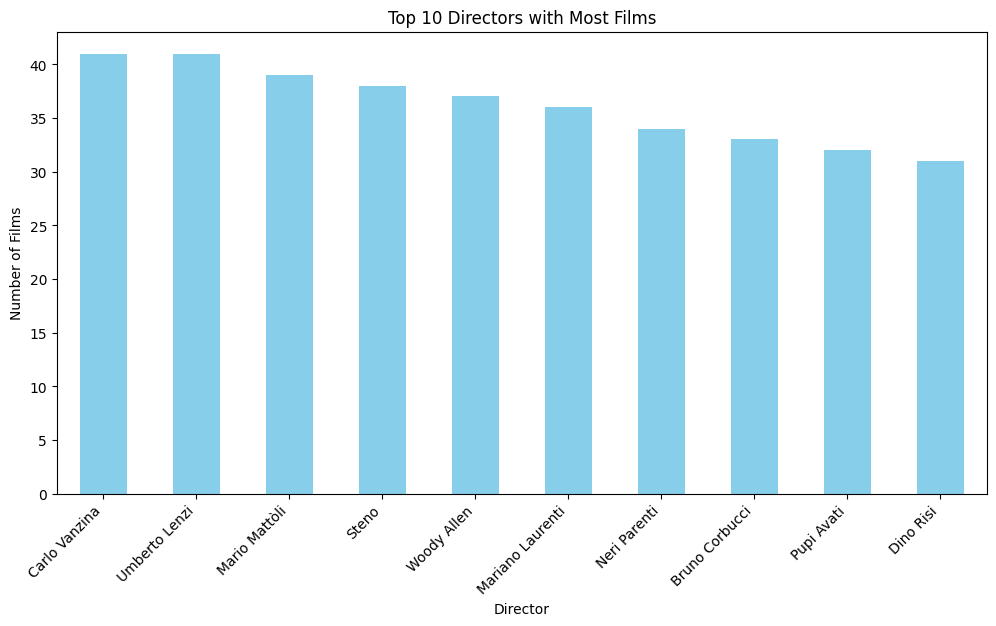

In [4]:
director_counts = df['directors'].value_counts()

top_directors = director_counts.head(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors with Most Films')
plt.xlabel('Director')
plt.ylabel('Number of Films')
plt.xticks(rotation=45, ha='right')
plt.show()


# 4) Stato

Questo codice calcola il numero di film per ogni paese, identifica i primi 10 paesi con il maggior numero di film e crea un grafico a barre dei valori ottenuti.

The country with the most movies is: United States


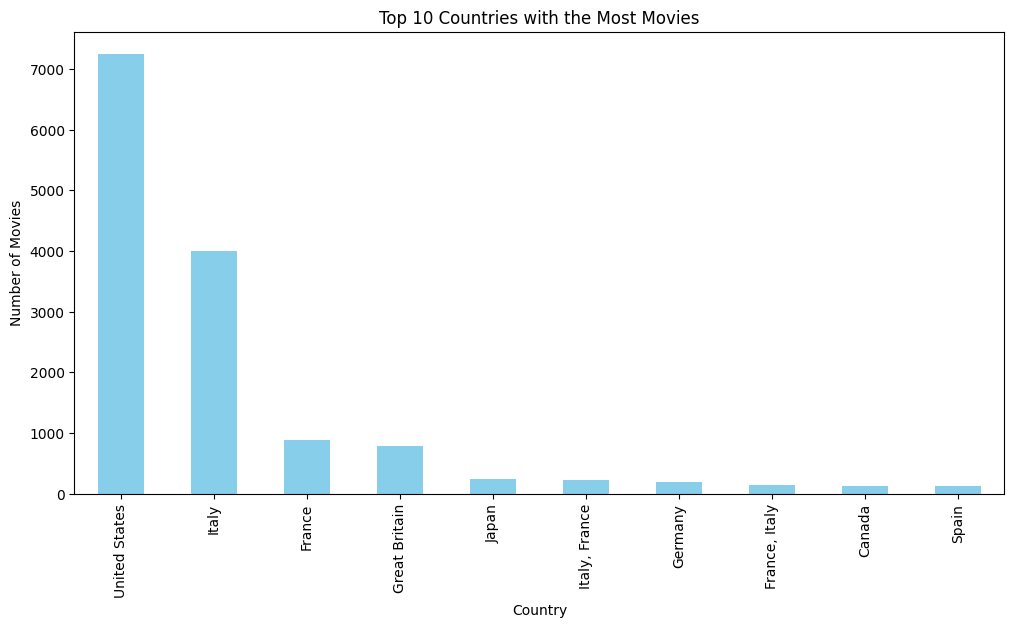

In [5]:
movies_for_country = df['country'].value_counts()

top_countries = movies_for_country.head(10)

country_with_more_movies = top_countries.idxmax()
print("The country with the most movies is:", country_with_more_movies)

top_countries.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Countries with the Most Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

# 5) Direttore/attore più frequente

Questo codice utilizza Seaborn per creare un grafico a barre che mostra le 10 coppie direttore-attore più comuni. La nuova colonna 'directors_actors' viene creata combinando le colonne 'directors' e 'actors'. Il conteggio delle occorrenze di ciascuna coppia viene quindi utilizzato per generare il grafico a barre.

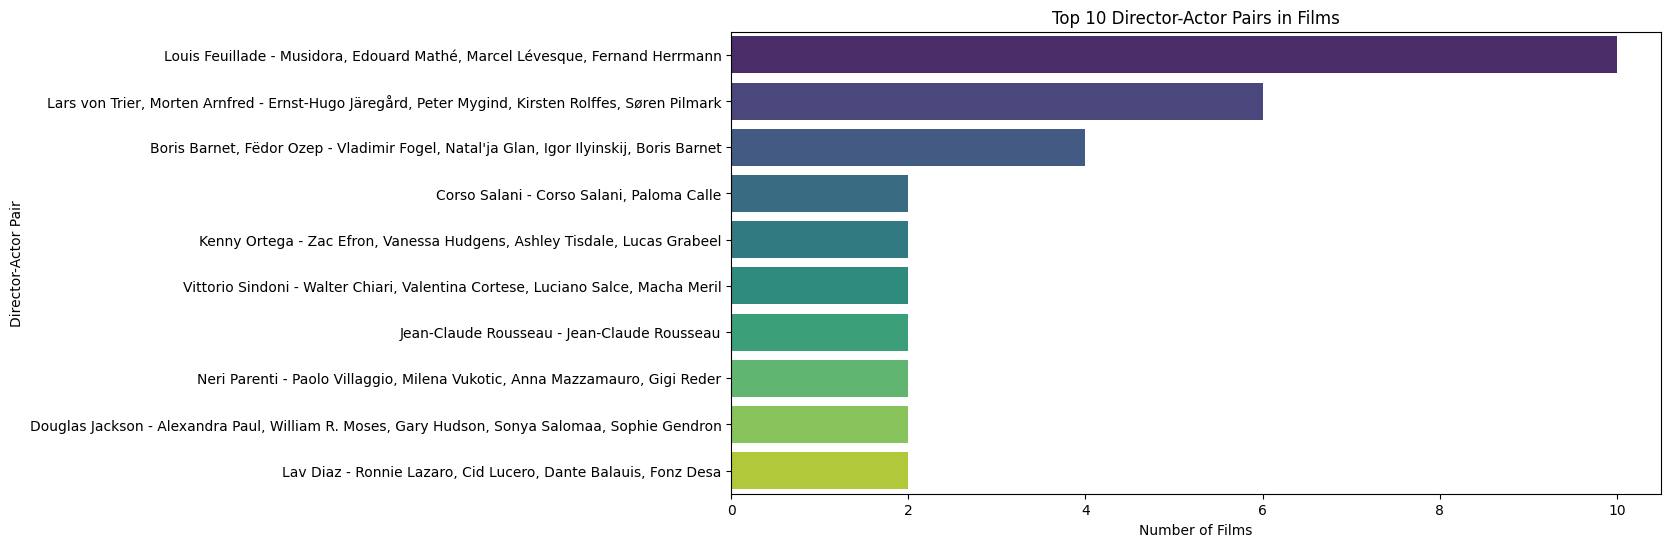

In [6]:
import seaborn as sns


df_filtered_2 = df[df['actors'] != 'Attori non professionisti'].copy()

df_filtered_2['directors_actors'] = df_filtered_2['directors'] + ' - ' + df_filtered_2['actors']

director_actor_counts = df_filtered_2['directors_actors'].value_counts()

top_pairs = director_actor_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pairs.values, y=top_pairs.index, hue=top_pairs.index, palette="viridis", dodge=False, legend=False)
plt.title('Top 10 Director-Actor Pairs in Films')
plt.xlabel('Number of Films')
plt.ylabel('Director-Actor Pair')
plt.show()

# 6) Storia vera

Questo codice analizza la colonna 'description' contenente informazioni sui film. Conta quanti di questi film hanno 'true story' nella loro descrizione e crea quindi un grafico a torta per visualizzare la distribuzione dei film in base a questa caratteristica. Il grafico mostra la percentuale di film basati su una 'true story' rispetto a quelli non.








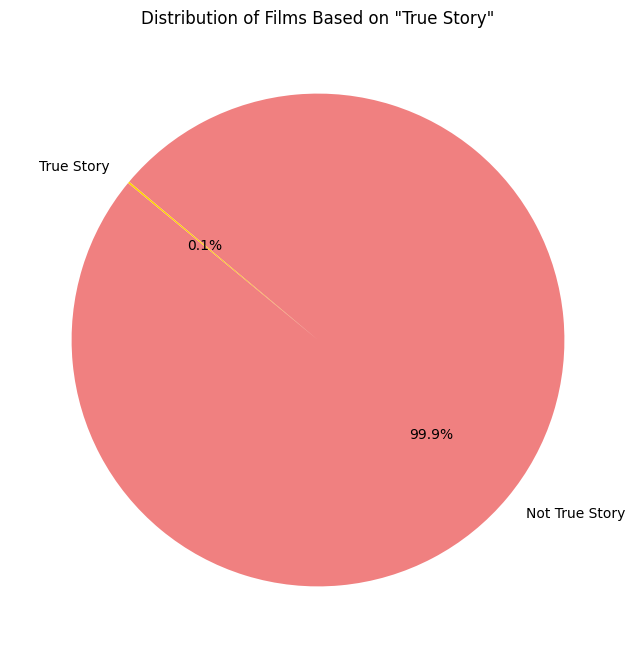

In [7]:
true_story_counts = df['description'].str.contains('true story', case=False).sum()

non_true_story_counts = len(df) - true_story_counts

labels = ['True Story', 'Not True Story']
sizes = [true_story_counts, non_true_story_counts]
colors = ['gold', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Films Based on "True Story"')
plt.show()

# 7) I film più divertenti secondo il voto del pubblico

Questo codice estrae i film comici, li ordina in base ai voti del pubblico in ordine decrescente e quindi stampa i titoli e i voti pubblici dei primi 5 film più votati.

In [8]:
comedy_films = df[df['genre'].str.contains('Comedy', case=False)]

sorted_comedy_films = comedy_films.sort_values(by='public_vote', ascending=False)

most_humorous_films = sorted_comedy_films.head(5)
print("The most humorous comedy films according to the audience:")
print(most_humorous_films[['title', 'public_vote']])

The most humorous comedy films according to the audience:
                                    title  public_vote
9256                          Star Struck         10.0
11865                   La femme défendue         10.0
526                       Kids Like These         10.0
15852  Abbott and Costello Meet the Mummy         10.0
22155                       Italian Dream         10.0


#Aggiunta secondo df

Questo codice importa i dati relativi alle vendite di Fast Food ed elimina le righe contenenti valori mancanti, stampando infine le dimensioni.


In [9]:
url = 'https://raw.githubusercontent.com/usnmweb/python-AMA/main/csv/Balaji%20Fast%20Food%20Sales.csv'
df_food = pd.read_csv(url)
df_food.columns

df_food = df_food.dropna()

print(len(df_food.index), len(df_food.columns))

893 10


#Merge

Questo codice effetua il merge dei precedenti df creando un nuovo df

In [10]:
df_food['year'] = pd.to_datetime(df_food['date']).dt.year

merged_df = pd.merge(df, df_food, on='year')

print("Colonne di merged_df:", merged_df.columns)

Colonne di merged_df: Index(['filmtv_id', 'title', 'year', 'genre', 'duration', 'country',
       'directors', 'actors', 'avg_vote', 'critics_vote', 'public_vote',
       'total_votes', 'description', 'notes', 'humor', 'rhythm', 'effort',
       'tension', 'erotism', 'order_id', 'date', 'item_name', 'item_type',
       'item_price', 'quantity', 'transaction_amount', 'transaction_type',
       'received_by', 'time_of_sale'],
      dtype='object')


# 8)  Film più popolare, giorno di picco e prodotto maggiormente ordinato

Questo codice trova i top film, le top date e le top item names per ogni anno. Successivamente, crea un grafico a torta per visualizzare i risultati.

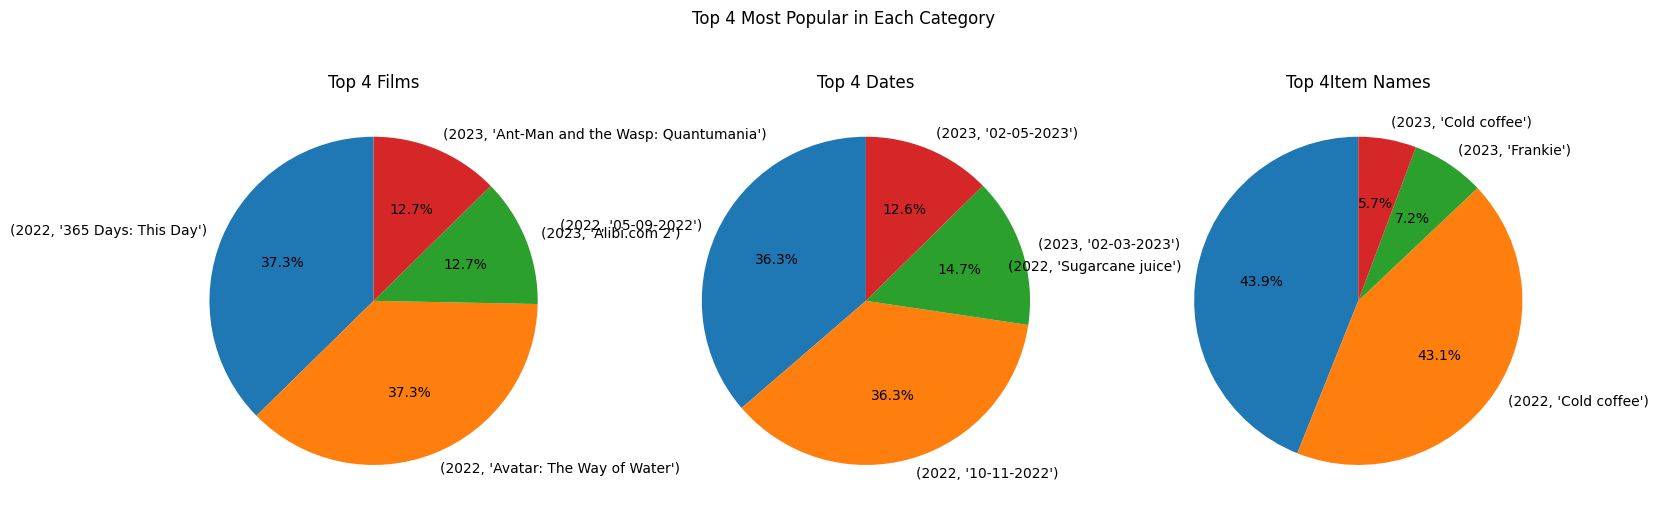

In [11]:
top_films_by_year = merged_df.groupby(['year', 'title']).size().groupby('year').nlargest(2).reset_index(level=0, drop=True)

top_dates_by_year = merged_df.groupby(['year', 'date']).size().groupby('year').nlargest(2).reset_index(level=0, drop=True)

top_items_by_year = merged_df.groupby(['year', 'item_name']).size().groupby('year').nlargest(2).reset_index(level=0, drop=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Top 4 Most Popular in Each Category')

axes[0].pie(top_films_by_year, labels=top_films_by_year.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Top 4 Films')

axes[1].pie(top_dates_by_year, labels=top_dates_by_year.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Top 4 Dates')

axes[2].pie(top_items_by_year, labels=top_items_by_year.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Top 4Item Names')

plt.show()

# 9) Lo stato in cui sono state fatte più transazioni, metodo di pagamento, genere operatore che ha ricevuto l'ordine

Questo codice raggruppa i dati in base alle colonne 'country', 'transaction_type', e 'received_by'.

Per ciascun gruppo, calcola la somma dell'importo della transazione 'transaction_amount'.

Trova l'indice dell'elemento con l'importo massimo all'interno di tutti i gruppi.

Estrae le informazioni specifiche sulla transazione (paese, tipo di transazione, genere del commesso che ha ricevuto l'ordine).

In [12]:
most_transaction_info = merged_df.groupby(['country', 'transaction_type', 'received_by'])['transaction_amount'].sum().idxmax()

most_transaction_country = most_transaction_info[0]
most_transaction_type = most_transaction_info[1]
most_received_by = most_transaction_info[2]

print("Country with the most transaction amount:", most_transaction_country)
print("Transaction type with the most transaction amount:", most_transaction_type)
print("Received by with the most transaction amount:", most_received_by)

Country with the most transaction amount: United States
Transaction type with the most transaction amount: Cash
Received by with the most transaction amount: Mr.


# 10) Top 5 delle categorie principali

Questo codice definisce una lista di categorie di interesse.

Crea un subplot per ogni categoria.
Per ogni categoria, trova e identifica i cinque valori più frequenti.

Crea un grafico a torta con le informazioni trovate e imposta il titolo di ciascun sottografo con il nome della categoria.









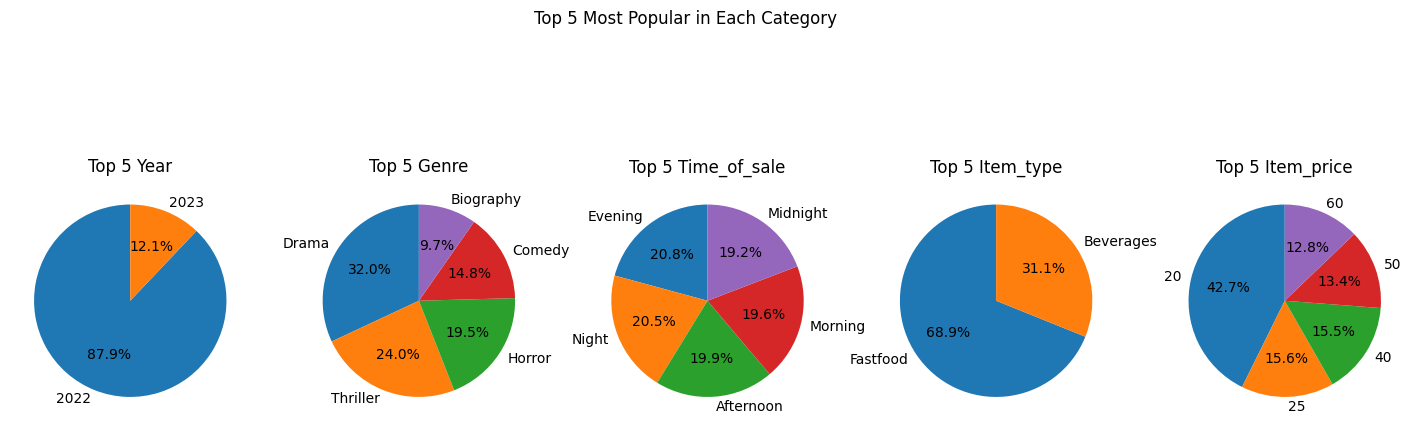

In [13]:
categories = ['year', 'genre', 'time_of_sale', 'item_type', 'item_price']

fig, axes = plt.subplots(1, len(categories), figsize=(18, 6))
fig.suptitle('Top 5 Most Popular in Each Category')

for i, category in enumerate(categories):
    top_values_by_category = merged_df.groupby([category]).size().nlargest(5)


    axes[i].pie(top_values_by_category, labels=top_values_by_category.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Top 5 {category.capitalize()}')

plt.show()

##Fine Lavori